# Case studies of years with high/low (re)stratification in the upper and lower layer

In [1]:
import scipy.io as sio
import numpy as np
import datetime
import gsw
import pandas as pd
from scipy import signal
from scipy.stats import pearsonr
import matplotlib
import matplotlib.pyplot as plt
import cmocean.cm as cmo
import seaborn as sns
sns.set_style('darkgrid')
from info import datadir, figdir, getMonths, makeClimatology

import warnings
warnings.filterwarnings('ignore')

In [2]:
data = sio.loadmat(datadir+'timedepth_DCA.mat')
time = data['time'][0]
t0 = datetime.datetime(1950,1,1,0,0) # origin of time = 1 January 1950, 00:00:00 UTC
dates = np.array([t0 + datetime.timedelta(hours=i) for i in time])
years = np.array([date.year for date in dates])
depth = data['depth'][0]
SA = data['SA']
CT = data['CT']
sigma0 = data['sigma0']

In [3]:
titles = {0: 'January', 1: 'February', 2: 'March', 3: 'April', 4: 'May', 5: 'June', 6: 'July', 7: 'August',\
          8: 'September', 9: 'October', 10: 'November', 11: 'December'}
cmap = matplotlib.cm.get_cmap('cmo.thermal')
#colors = np.array([cmap(i) for i in np.linspace(0,0.75,3)])
colors = np.array([cmap(0),cmap(0.55),cmap(0.75)])

def plotProfiles_upper(ax,data,year,colors,datalabel,mindepth,maxdepth,xlim):
    """
    Upper layer: look at February + September
    """
    yr_start1 = np.where(years==year[0])[0][0]
    yr_start2 = np.where(years==year[1])[0][0]
    ax.plot(data[yr_start1+1,mindepth:maxdepth],depth[mindepth:maxdepth],label='February '+str(year[0]),color=colors[0],linestyle='dashed',linewidth=2)
    ax.plot(data[yr_start1+7,mindepth:maxdepth],depth[mindepth:maxdepth],label='August '+str(year[0]),color=colors[0],linewidth=2)
    ax.plot(data[yr_start2+1,mindepth:maxdepth],depth[mindepth:maxdepth],label='February '+str(year[1]),color=colors[1],linestyle='dashed',linewidth=2)
    ax.plot(data[yr_start2+7,mindepth:maxdepth],depth[mindepth:maxdepth],label='August '+str(year[1]),color=colors[1],linewidth=2)
    data_clim = makeClimatology(data,dates)
    ax.plot(data_clim[1,mindepth:maxdepth],depth[mindepth:maxdepth],label='February Climatology',color=colors[2],linestyle='dashed',linewidth=3)
    ax.plot(data_clim[7,mindepth:maxdepth],depth[mindepth:maxdepth],label='August Climatology',color=colors[2],linewidth=4)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlabel(datalabel, fontsize=13)
    ax.set_ylabel('Depth (m)', fontsize=13)
    ax.set_xlim(xlim)
    
def plotProfiles_lower(ax,data,year,colors,datalabel,mindepth,maxdepth,xlim):
    """
    Lower layer: look at March + November
    """
    yr_start1 = np.where(years==year[0])[0][0]
    yr_start2 = np.where(years==year[1])[0][0]
    ax.plot(data[yr_start1+2,mindepth:maxdepth],depth[mindepth:maxdepth],label='March '+str(year[0]),color=colors[0],linestyle='dashed',linewidth=2)
    ax.plot(data[yr_start1+10,mindepth:maxdepth],depth[mindepth:maxdepth],label='November '+str(year[0]),color=colors[0],linewidth=2)
    ax.plot(data[yr_start2+2,mindepth:maxdepth],depth[mindepth:maxdepth],label='March '+str(year[1]),color=colors[1],linestyle='dashed',linewidth=2)
    ax.plot(data[yr_start2+10,mindepth:maxdepth],depth[mindepth:maxdepth],label='November '+str(year[1]),color=colors[1],linewidth=2)
    data_clim = makeClimatology(data,dates)
    ax.plot(data_clim[2,mindepth:maxdepth],depth[mindepth:maxdepth],label='March Climatology',color=colors[2],linestyle='dashed',linewidth=3)
    ax.plot(data_clim[10,mindepth:maxdepth],depth[mindepth:maxdepth],label='November Climatology',color=colors[2],linewidth=4)
    ax.set_ylim(ax.get_ylim()[::-1])
    ax.tick_params(axis='both', labelsize=13)
    ax.set_xlabel(datalabel, fontsize=13)
    ax.set_ylabel('Depth (m)', fontsize=13)
    ax.set_xlim(xlim)

## Upper layer

In [4]:
depth_upper=np.where(depth>90)[0][0]+1
xlim_S = (34.77,35.17)
xlim_T = (3.5,12)
xlim_sigma0 = (26.25,27.75)

### High stratification

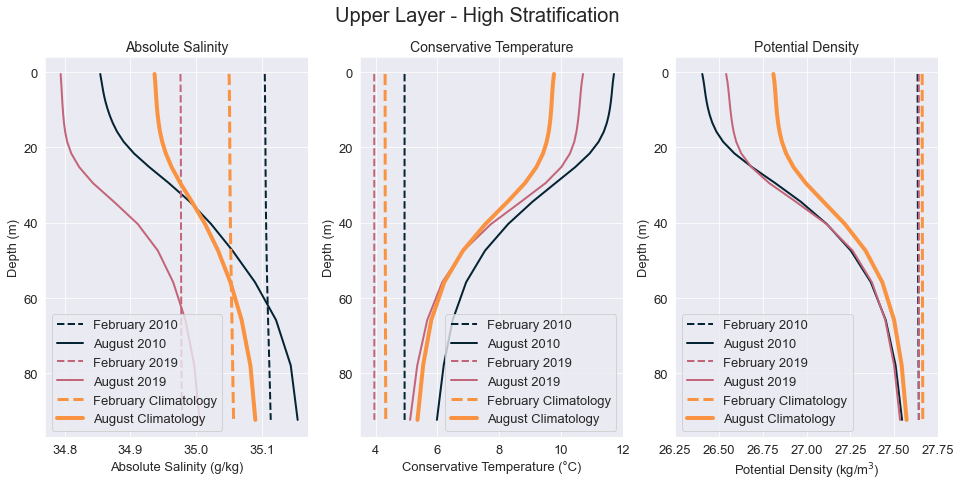

In [5]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,7))
plotProfiles_upper(ax1,SA,[2010,2019],colors,'Absolute Salinity (g/kg)',0,depth_upper,xlim_S)
ax1.legend(fontsize=13)
ax1.set_title('Absolute Salinity',fontsize=14)
plotProfiles_upper(ax2,CT,[2010,2019],colors,'Conservative Temperature ('+'\u00B0'+'C)',0,depth_upper,xlim_T)
ax2.legend(fontsize=13)
ax2.set_title('Conservative Temperature',fontsize=14)
plotProfiles_upper(ax3,sigma0,[2010,2019],colors,'Potential Density (kg/m$^3$)',0,depth_upper,xlim_sigma0)
ax3.legend(fontsize=13)
ax3.set_title('Potential Density',fontsize=14)
fig.suptitle('Upper Layer - High Stratification',fontsize=20)
plt.savefig(figdir+'upper_high.pdf',bbox_inches='tight')
plt.savefig(figdir+'upper_high.png',dpi=500,bbox_inches='tight')
plt.show()

### Low stratification

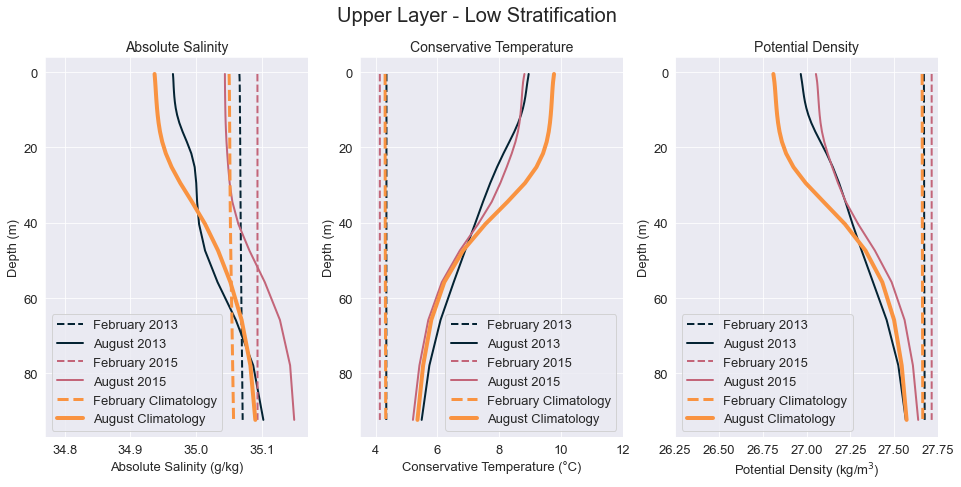

In [6]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,7))
plotProfiles_upper(ax1,SA,[2013,2015],colors,'Absolute Salinity (g/kg)',0,depth_upper,xlim_S)
ax1.legend(fontsize=13)
ax1.set_title('Absolute Salinity',fontsize=14)
plotProfiles_upper(ax2,CT,[2013,2015],colors,'Conservative Temperature ('+'\u00B0'+'C)',0,depth_upper,xlim_T)
ax2.legend(fontsize=13)
ax2.set_title('Conservative Temperature',fontsize=14)
plotProfiles_upper(ax3,sigma0,[2013,2015],colors,'Potential Density (kg/m$^3$)',0,depth_upper,xlim_sigma0)
ax3.legend(fontsize=13)
ax3.set_title('Potential Density',fontsize=14)
fig.suptitle('Upper Layer - Low Stratification',fontsize=20)
plt.savefig(figdir+'upper_low.pdf',bbox_inches='tight')
plt.savefig(figdir+'upper_low.png',dpi=500,bbox_inches='tight')
plt.show()

## Lower layer

In [7]:
depth_upper=np.where(depth>90)[0][0]+1
depth_lower=np.where(depth>500)[0][0]+1
xlim_S = (35.03,35.2)
xlim_T = (3.5,6.7)
xlim_sigma0 = (27.4,27.75)

### High stratification

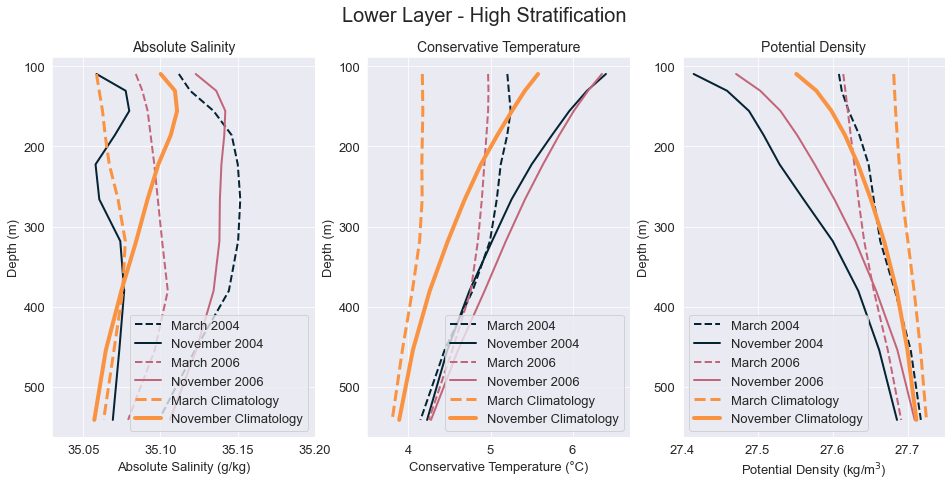

In [8]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,7))
plotProfiles_lower(ax1,SA,[2004,2006],colors,'Absolute Salinity (g/kg)',depth_upper,depth_lower,xlim_S)
ax1.legend(fontsize=13)
ax1.set_title('Absolute Salinity',fontsize=14)
plotProfiles_lower(ax2,CT,[2004,2006],colors,'Conservative Temperature ('+'\u00B0'+'C)',depth_upper,depth_lower,xlim_T)
ax2.legend(fontsize=13)
ax2.set_title('Conservative Temperature',fontsize=14)
plotProfiles_lower(ax3,sigma0,[2004,2006],colors,'Potential Density (kg/m$^3$)',depth_upper,depth_lower,xlim_sigma0)
ax3.legend(fontsize=13)
ax3.set_title('Potential Density',fontsize=14)
fig.suptitle('Lower Layer - High Stratification',fontsize=20)
plt.savefig(figdir+'lower_high.pdf',bbox_inches='tight')
plt.savefig(figdir+'lower_high.png',dpi=500,bbox_inches='tight')
plt.show()

### Low stratification

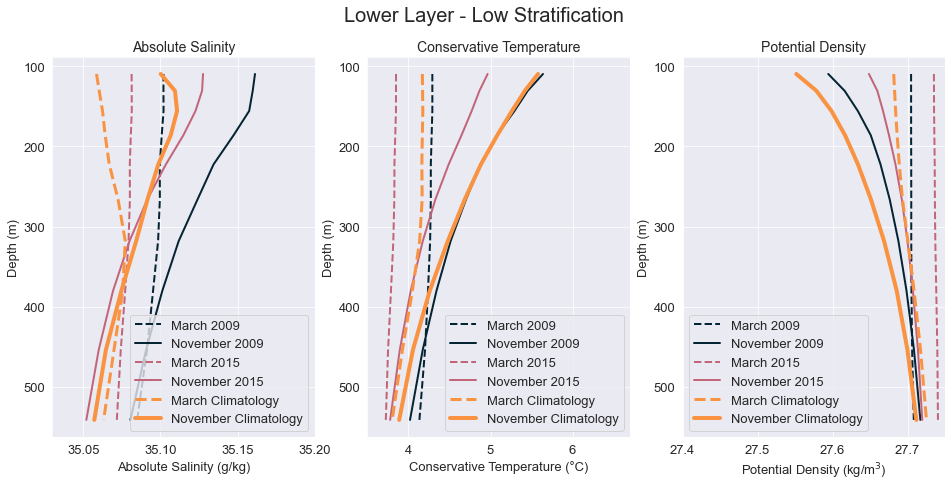

In [9]:
fig, (ax1,ax2,ax3) = plt.subplots(1,3,figsize=(16,7))
plotProfiles_lower(ax1,SA,[2009,2015],colors,'Absolute Salinity (g/kg)',depth_upper,depth_lower,xlim_S)
ax1.legend(fontsize=13)
ax1.set_title('Absolute Salinity',fontsize=14)
plotProfiles_lower(ax2,CT,[2009,2015],colors,'Conservative Temperature ('+'\u00B0'+'C)',depth_upper,depth_lower,xlim_T)
ax2.legend(fontsize=13)
ax2.set_title('Conservative Temperature',fontsize=14)
plotProfiles_lower(ax3,sigma0,[2009,2015],colors,'Potential Density (kg/m$^3$)',depth_upper,depth_lower,xlim_sigma0)
ax3.legend(fontsize=13)
ax3.set_title('Potential Density',fontsize=14)
fig.suptitle('Lower Layer - Low Stratification',fontsize=20)
plt.savefig(figdir+'lower_low.pdf',bbox_inches='tight')
plt.savefig(figdir+'lower_low.png',dpi=500,bbox_inches='tight')
plt.show()